In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../20_intermediate_files/final_df.csv')

In [3]:
df.columns

Index(['state', 'Children 0-18', 'Adults 19-25', 'Adults 26-34',
       'Adults 35-54', 'Adults 55-64', '65+', 'year',
       'Total People Experiencing Homelessness', 'gdp',
       'American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White', 'gini', 'international_migration',
       'unemployment_rate', 'State', 'Population', 'Index', 'Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft', 'with_death_penalty',
       'Violent_Crimes', 'Violent_Crime_Rate'],
      dtype='object')

In [4]:
df.sample(10)

state  Children 0-18  Adults 19-25  Adults 26-34  Adults 35-54   
374  North Carolina          0.256         0.089         0.116         0.287  \
300        Nebraska          0.272         0.092         0.118         0.278   
436    Pennsylvania          0.229         0.090         0.110         0.274   
555       Wisconsin          0.247         0.090         0.114         0.280   
341      New Jersey          0.242         0.084         0.114         0.289   
329   New Hampshire          0.219         0.082         0.104         0.293   
271     Mississippi          0.263         0.094         0.109         0.257   
148        Illinois          0.253         0.093         0.124         0.277   
77      Connecticut          0.235         0.082         0.111         0.286   
330   New Hampshire          0.217         0.085         0.103         0.286   

     Adults 55-64    65+  year  Total People Experiencing Homelessness   
374         0.123  0.130  2010                                   12191  \
300         0.111  0.128  2008                                    3985   
436         0.138  0.159  2012                                   14736   
555         0.132  0.137  2011                                    5785   
341         0.128  0.143  2013                                   12002   
329         0.150  0.152  2013                                    1447   
271         0.128  0.148  2015                                    1983   
148         0.123  0.130  2012                                   14144   
77          0.137  0.150  2013                                    4448   
330         0.153  0.157  2014                                    1376   

          gdp  ...  Murder  Rape  Robbery  Aggravated Assault  Burglary   
374  420027.6  ...     474  2002     9620               22554    102826  \
300   85628.0  ...      69   600     1297                3571      8717   
436  647925.9  ...     707  3371    15735               25571     57040   
555  266364.4  ...     138  1190     4600                8340     27167   
341  534177.8  ...     404   861    12084               12071     35883   
329   70476.2  ...      21   522      647                1506      4979   
271  105914.6  ...     253   851     2312                4467     25068   
148  726399.1  ...     770  3581    19480               29725     71100   
77   241517.4  ...      91   647     3551                4906     12934   
330   72995.2  ...      16   438      544                1469      4191   

     Larceny-Theft  Vehicle Theft with_death_penalty  Violent_Crimes   
374         208057          18319                  1           69329  \
300          38393           4223                  1           11074   
436         204409          15113                  1           90768   
555         104472           8273                  0           28536   
341         118005          13746                  0           51168   
329          23355            944                  1            5648   
271          56446           4271                  1           16073   
148         235314          26292                  0          107112   
77           52099           6241                  0           18634   
330          21051            856                  1            5092   

     Violent_Crime_Rate  
374            0.007252  
300            0.006215  
436            0.007111  
555            0.004998  
341            0.005742  
329            0.004270  
271            0.005377  
148            0.008324  
77             0.005177  
330            0.003834  

[10 rows x 32 columns]

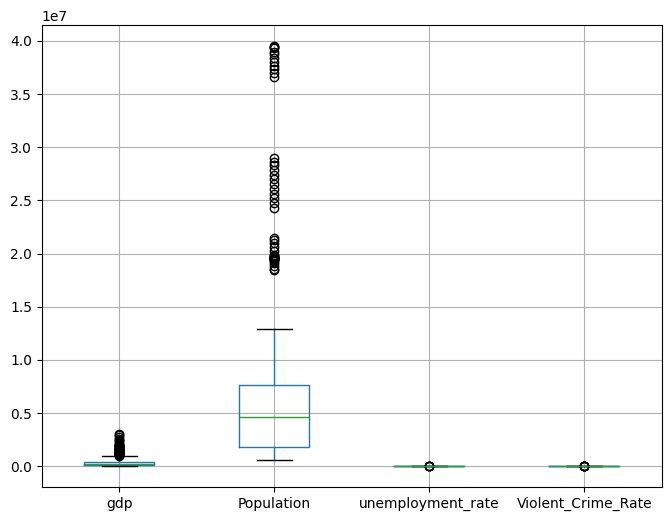

In [5]:
df.boxplot(column=['gdp', 'Population', 'unemployment_rate', 'Violent_Crime_Rate'], figsize=(8,6))
plt.show()

In [6]:
crime_rate_line_chart = alt.Chart(df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

crime_rate_line_chart

alt.Chart(...)

In [7]:
all_states = df['state'].unique().tolist()

treatment_states = ['Alaska', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Iowa',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'New Jersey', 'New Mexico', 'New York', 'North Dakota',
       'Rhode Island', 'Vermont', 'Washington', 'West Virginia',
       'Wisconsin']

control_states = [state for state in all_states if state not in treatment_states]

In [8]:
print(f'Treatment States: {treatment_states}'
and f'Control States: {control_states}')

Control States: ['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Kentucky', 'Louisiana', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Virginia', 'Wyoming']


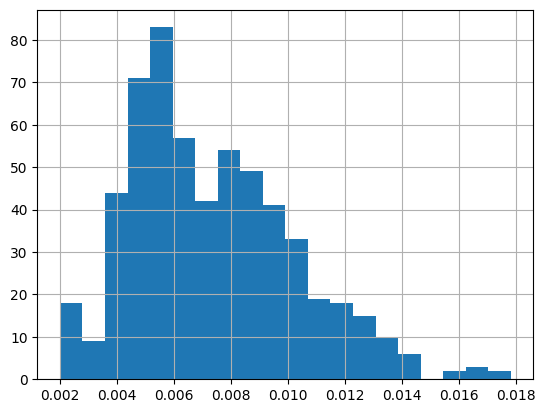

state  year  Violent_Crime_Rate
20       Alaska  2016            0.016091
21       Alaska  2017            0.016580
22       Alaska  2018            0.017833
23       Alaska  2019            0.017341
358  New Mexico  2018            0.016855
359  New Mexico  2019            0.016644

In [101]:
# check abnormality of crime rate
df['Violent_Crime_Rate'].hist(bins=20)
plt.show()

# find state and year where crime rate is outside of 3 standard deviations
df_abnormal = df[(df['Violent_Crime_Rate'] > df['Violent_Crime_Rate'].mean() \
                                            + 3*df['Violent_Crime_Rate'].std()) \
                | (df['Violent_Crime_Rate'] < df['Violent_Crime_Rate'].mean() \
                                            - 3*df['Violent_Crime_Rate'].std())]
df_abnormal.loc[:, ['state', 'year', 'Violent_Crime_Rate']]

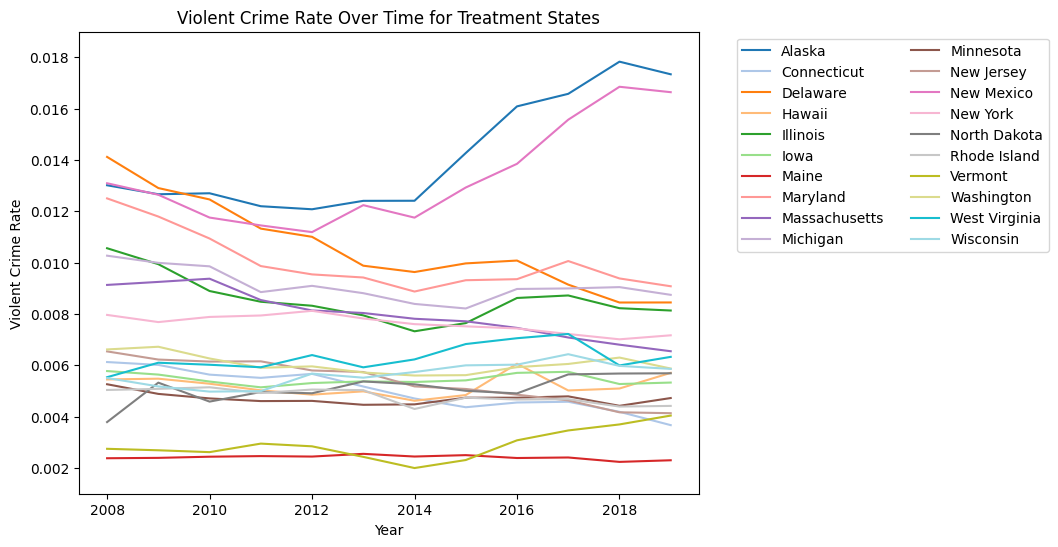

In [9]:
# plot treatment states' crime rate over time using matplotlib in a single plot
fig, ax = plt.subplots(figsize=(8,6))
# using tab20b color palette
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab20(np.linspace(0, 1, 20))))

for state in treatment_states:
    df[df['state']==state].plot(x='year', y='Violent_Crime_Rate', ax=ax, label=state, )
plt.legend(ncols=2, bbox_to_anchor=(1.05, 1))
plt.ylim(0.001, 0.019)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.title('Violent Crime Rate Over Time for Treatment States')
plt.show()

# save to file
fig.savefig('../30_results/treatment_states_crime_rate.png', bbox_inches='tight')

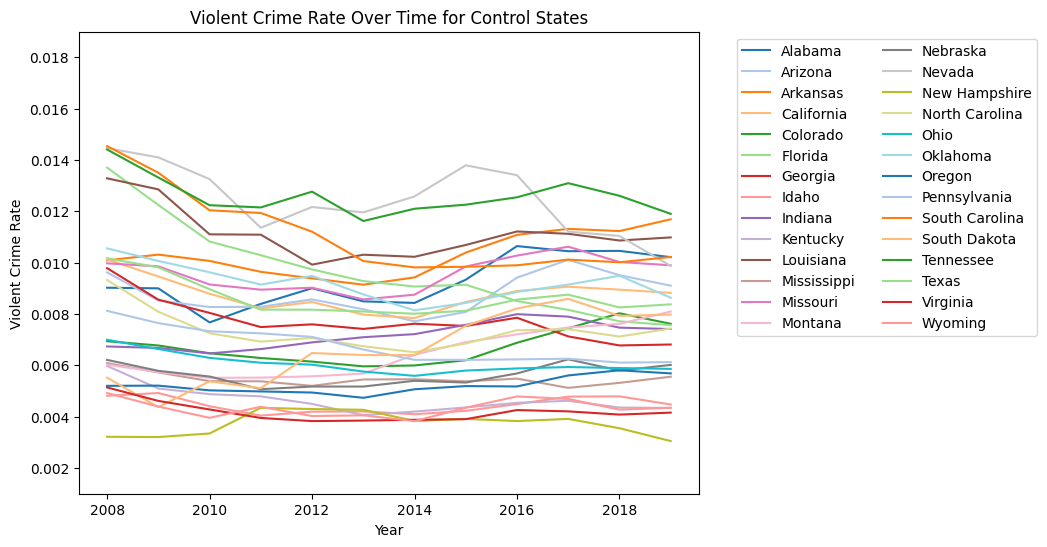

In [10]:
# plot control states' crime rate over time
fig, ax = plt.subplots(figsize=(8,6))
# using tab20b color palette
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.tab20(np.linspace(0, 1, 20))))

for state in control_states:
    df[df['state']==state].plot(x='year', y='Violent_Crime_Rate', ax=ax, label=state, )
plt.legend(ncols=2, bbox_to_anchor=(1.05, 1))
plt.ylim(0.001, 0.019)
plt.xlabel('Year')
plt.ylabel('Violent Crime Rate')
plt.title('Violent Crime Rate Over Time for Control States')
plt.show()

# save to file
fig.savefig('../30_results/control_states_crime_rate.png', bbox_inches='tight')

In [11]:
# Select the variables of interest
selected_vars = ['Children 0-18', 'Adults 19-25', 'Adults 26-34',
       'Adults 35-54', 'Adults 55-64', '65+', 
       'American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White', 'Population', 
       'international_migration',
       'Total People Experiencing Homelessness', 'gdp',
       'gini', 
       'unemployment_rate']

# Select the statistics of interest
selected_stats = ['min', 'max','mean', 'std']

In [12]:
summary_table = df[selected_vars].describe().loc[selected_stats]
summary_table = summary_table.round(3)
summary_table

Children 0-18  Adults 19-25  Adults 26-34  Adults 35-54  Adults 55-64   
min           0.190         0.071         0.099         0.232         0.099  \
max           0.296         0.124         0.142         0.324         0.165   
mean          0.244         0.090         0.118         0.268         0.131   
std           0.019         0.006         0.008         0.017         0.011   

        65+  American Indian or Alaska Native  Asian or Pacific Islander   
min   0.074                          3011.000                   5239.000  \
max   0.213                        790100.000                6751372.000   
mean  0.148                         91280.887                 393360.330   
std   0.022                        132596.492                 898392.264   

      Black or African American         White   Population   
min                    6502.000  4.037750e+05    532981.00  \
max                 3898379.000  2.915865e+07  39512223.00   
mean                 904805.602  5.080361e+06   6472218.71   
std                 1036083.244  5.469300e+06   7142130.35   

      international_migration  Total People Experiencing Homelessness   
min                  -697.000                                 515.000  \
max                167173.000                              151278.000   
mean                16573.111                               11969.399   
std                 27126.218                               21143.996   

              gdp   gini  unemployment_rate  
min     25999.300  0.400              0.024  
max   3042694.100  0.516              0.138  
mean   351650.726  0.461              0.060  
std    436006.192  0.020              0.023

In [13]:
summary_table.to_csv('../20_intermediate_files/summary_table.csv')

In [14]:
crime_vars = ['Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft', 'with_death_penalty',
       'Violent_Crimes', 'Violent_Crime_Rate']

In [15]:
summary_table_2 = df[crime_vars].describe().loc[selected_stats]
summary_table_2 = summary_table_2.round(3)
summary_table_2 

Violent     Property    Murder       Rape    Robbery   
min      643.000     8211.000     5.000     85.000     53.000  \
max   185173.000  1080766.000  2142.000  15506.000  69385.000   
mean   25640.944   171026.875   319.719   2052.007   7034.016   
std    31545.421   195771.375   363.166   2295.517  10108.506   

      Aggravated Assault    Burglary  Larceny-Theft  Vehicle Theft   
min              444.000    1275.000       6451.000        196.000  \
max           105541.000  245767.000     678455.000     192529.000   
mean           16021.609   36472.707     119228.307      15325.958   
std            19225.258   43519.134     131319.729      24959.546   

      with_death_penalty  Violent_Crimes  Violent_Crime_Rate  
min                0.000        1254.000               0.002  
max                1.000      370346.000               0.018  
mean               0.648       51068.295               0.007  
std                0.478       62909.913               0.003

In [16]:
correlation_matrix = df[selected_vars].corr()

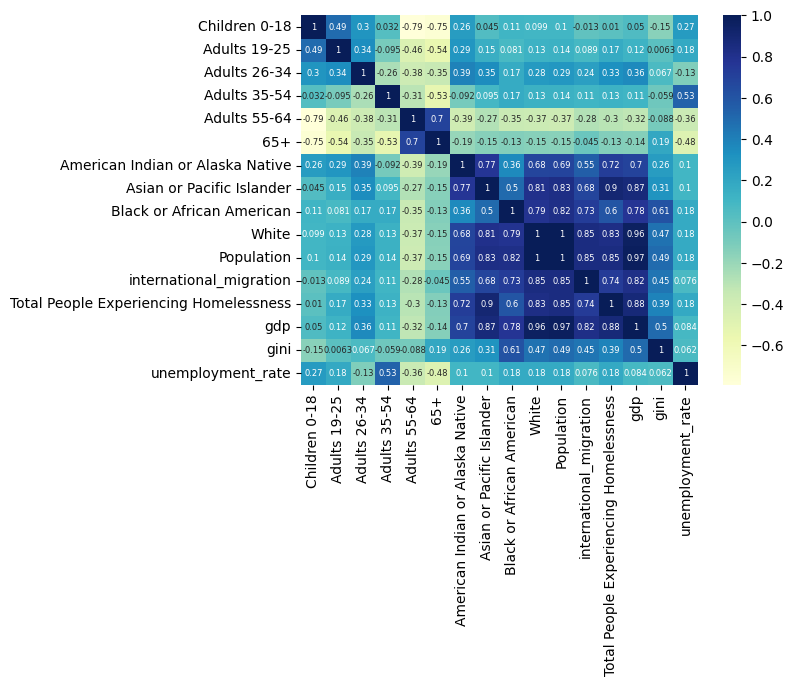

In [17]:
sns.heatmap(correlation_matrix, annot=True,cmap="YlGnBu", annot_kws={"fontsize":6})
plt.show()

In [18]:
df['gdp_per_capita'] = df['gdp']/df['Population']
df['Adults 55+'] = df['Adults 55-64'] + df['65+']

In [19]:
updated_vars = ['Children 0-18', 'Adults 19-25', 'Adults 26-34',
       'Adults 35-54', 'Adults 55+',
       'international_migration',
       'Total People Experiencing Homelessness', 
       'gini', 'gdp_per_capita',
       'unemployment_rate']

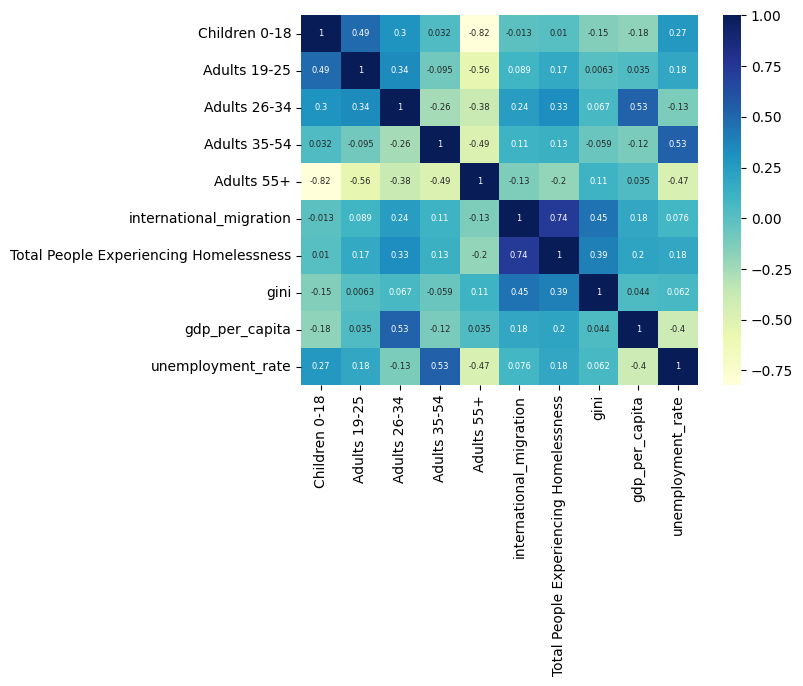

In [20]:
correlation_matrix_2 = df[updated_vars].corr()
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix_2, annot=True,cmap="YlGnBu", annot_kws={"fontsize":6})

# Display the plot
plt.show()

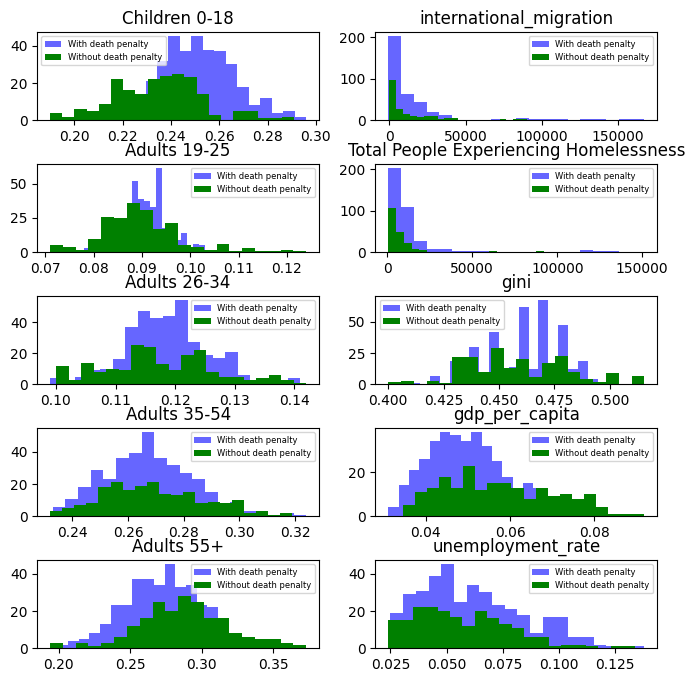

In [21]:
death_penalty = df[df['with_death_penalty'] == 1][updated_vars]
no_death_penalty = df[df['with_death_penalty'] == 0][updated_vars]
# Create histograms of the variables
#fig, axs = plt.subplots(nrows=len(updated_vars), ncols=1, figsize=(8,40))
fig, axs = plt.subplots(5,2,figsize=(8,8))

for i, var in enumerate(updated_vars):
    axs[i%5][i//5].hist(death_penalty[var], color='blue', alpha=0.6, bins=20, label='With death penalty')
    axs[i%5][i//5].hist(no_death_penalty[var], color='green', bins=20, label='Without death penalty')
    axs[i%5][i//5].set_title(var)
    axs[i%5][i//5].legend(fontsize=6)

#plt.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.show()

In [22]:
death_penalty_chart = alt.Chart(df).mark_boxplot().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='with_death_penalty:N'
)

death_penalty_chart.properties(title='Violent Crime Rate by Year and Death Penalty Status')

alt.Chart(...)

In [23]:
abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, 
                "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011,
                "Iowa": 1965, "Maine": 1887, "Maryland": 2013, 
                "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911,
                "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009,
                "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984,
                "Vermont": 1972, "Virginia": 2021, "Washington": 2018,
                "West Virginia": 1965, "Wisconsin": 1853}

### Case: Diff-in-Diff

In [35]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [33]:
def model_reg(data, Y, X, alpha=0.05):
   
    x = data.loc[pd.notnull(data[Y]), X]
    xmin = x.min()
    xmax = x.max()
    step = (xmax - xmin) / 100
    grid = np.arange(xmin, xmax + step, step)
    predictions = pd.DataFrame({X: grid})
    model = smf.ols(f"{Y} ~ {X}", data=data).fit()
    model_predict = model.get_prediction(predictions[X])
    predictions[Y] = model_predict.summary_frame()["mean"]
    predictions[["ci_low", "ci_high"]] = model_predict.conf_int(alpha=alpha)
    return predictions

In [34]:
def build_chart(data, Y, X, alpha=0.05,colour='grey',indicator='Control States'):
    predictions = model_reg(data, Y, X, alpha)
    predictions['Category'] = indicator
    base = alt.Chart(predictions).mark_line(color=colour).encode(
        x=alt.X(
            X, 
            scale=alt.Scale(zero=False), 
            axis = alt.Axis(format="T", 
            title = "Year")), 
        y = alt.Y(
            Y, 
            scale=alt.Scale(zero=False),
            title = "Violent Crime Rate"),
        color=alt.Color("Category", legend=alt.Legend(title="Legend")),
    )
    ci = (
        alt.Chart(predictions)
        .mark_errorband(color = 'grey',opacity=0.2)
        .encode(
            x=X,
            y=alt.Y("ci_low", title=""),
            y2="ci_high",
        )
    )
    chart = ci + base
    return chart

Find control states via KMeans clustering

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [37]:
variables = ['Population', 'gdp_per_capita', 'unemployment_rate', 'Violent_Crime_Rate']

In [38]:
k_df = df.copy()
k_df = k_df[variables]

In [39]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(k_df)

In [40]:
# Cluster data
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
labels = kmeans.labels_

In [43]:
# Add cluster labels to data
df['Cluster'] = labels

#### 1. Illinois
abolish in 2011

In [78]:
# Find states in the same cluster as Illinois
illinois_cluster = df.loc[df['state'] == 'Illinois', 'Cluster'].values[0]
similar_states = df.loc[df['Cluster'] == illinois_cluster, 'state'].unique().tolist()

print(similar_states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']


In [79]:
# compare_states1 = ['Alabama', 'Arizona', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Illinois','Indiana','Louisiana']
# compare_states2 = ['Illinois', 'Missouri', 'Nevada','North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']
# case_df = df.copy()
# case_df = case_df[case_df['state'].isin(compare_states1) & (case_df['year'] >= 2000) & (case_df['year'] <= 2011)]

# case_graph = alt.Chart(case_df).mark_line().encode(
#     x='year:T',
#     y='Violent_Crime_Rate:Q',
#     color='state:N'
# )

# case_graph

# case_df = df.copy()
# case_df = case_df[case_df['state'].isin(compare_states2) & (case_df['year'] >= 2000) & (case_df['year'] <= 2011)]

# case_graph = alt.Chart(case_df).mark_line().encode(
#     x='year:T',
#     y='Violent_Crime_Rate:Q',
#     color='state:N'
# )

# case_graph

# # Pennsylvania, South Carolina, Florida
# case_states = ['Illinois', 'Pennsylvania', 'South Carolina', 'Florida']
# case_df = df.copy()
# case_df = case_df[case_df['state'].isin(case_states) & (case_df['year'] >= 2006) & (case_df['year'] <= 2017)]

abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, 
                "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011,
                "Iowa": 1965, "Maine": 1887, "Maryland": 2013, 
                "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911,
                "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009,
                "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984,
                "Vermont": 1972, "Virginia": 2021, "Washington": 2018,
                "West Virginia": 1965, "Wisconsin": 1853}

In [80]:
IL_compare_states = ['Alabama', 'Arizona', 'Arkansas', 'Florida', 'Georgia', \
                    'Indiana', 'Louisiana', 'Missouri', 'Nevada', 'North Carolina', \
                    'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']
print(len(IL_compare_states))
# plot the crime rate of Delaware and the states in DE compare states in 2015, 2016
IL_case_df = df.copy()
IL_case_states = IL_compare_states + ['Illinois']
IL_case_df = IL_case_df[IL_case_df['state'].isin(IL_case_states) & (IL_case_df['year'] >= 2015) \
                        & (IL_case_df['year'] <= 2016)]

IL_case_graph = alt.Chart(IL_case_df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

IL_case_graph

14


alt.Chart(...)

In [81]:
# prepare data for difference in difference analysis
IL_case_df = df.copy()
IL_case_df = IL_case_df[IL_case_df['state'].isin(IL_case_states)]

In [82]:
IL = IL_case_df.copy()
pre_IL_tr = IL[(IL['year'] <= 2011) & (IL['state'] == 'Illinois')]
post_IL_tr = IL[(IL['year'] >= 2012) & (IL['year'] <= 2017) & (IL['state'] == 'Illinois')]
pre_IL_ctr = IL[(IL['year'] <= 2011) & (IL['state'] != 'Illinois')]
post_IL_ctr = IL[(IL['year'] >= 2012) & (IL['year'] <= 2017) & (IL['state'] != 'Illinois')]

In [83]:
pre_IL_plot = build_chart(pre_IL_tr,  "Violent_Crime_Rate", "year", \
                          alpha=0.02, colour='red', indicator='Illinois')
post_IL_plot = build_chart(post_IL_tr, "Violent_Crime_Rate", "year",\
                           alpha=0.02,colour='red',indicator='Illinois')

pre_IL_ctr_plot = build_chart(pre_IL_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')
post_IL_ctr_plot = build_chart(post_IL_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')


diff_in_diff_IL = pre_IL_plot + post_IL_plot + pre_IL_ctr_plot + post_IL_ctr_plot
diff_in_diff_IL.properties(title=\
            "Difference in Difference Analysis of Violent Crime Rate between Illinois")

alt.LayerChart(...)

#### Maryland
abolish in 2013

In [68]:
# Find states in the same cluster as Illinois
MD_cluster = df.loc[df['state'] == 'Maryland', 'Cluster'].values[0]
MD_similar_states = df.loc[df['Cluster'] == MD_cluster, 'state'].unique().tolist()

print(MD_similar_states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Louisiana', 'Maryland', 'Massachusetts', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'Tennessee']


abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011, "Iowa": 1965, "Maine": 1887, "Maryland": 2013, "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911, "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009, "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984, "Vermont": 1972, "Virginia": 2021, "Washington": 2018, "West Virginia": 1965, "Wisconsin": 1853}

In [69]:
MD_compare_states = ['Alabama', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Indiana', 'Louisiana', \
                     'Missouri', 'Nevada', 'North Carolina', 'Oklahoma', 'Pennsylvania', 'South Carolina',\
                     'Tennessee']
print(len(MD_compare_states))
# plot the crime rate of Delaware and the states in DE compare states in 2015, 2016
MD_case_df = df.copy()
MD_case_states = MD_compare_states + ['Maryland']
MD_case_df = MD_case_df[MD_case_df['state'].isin(MD_case_states) & (MD_case_df['year'] >= 2013) \
                        & (MD_case_df['year'] <= 2014)]

MD_case_graph = alt.Chart(MD_case_df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

MD_case_graph

14


alt.Chart(...)

In [70]:
# prepare data for difference in difference analysis
MD_case_df = df.copy()
MD_case_df = MD_case_df[MD_case_df['state'].isin(MD_case_states)]

In [74]:
MD = MD_case_df.copy()
pre_MD_tr = MD[(MD['year'] <= 2013) & (MD['state'] == 'Maryland')]
post_MD_tr = MD[(MD['year'] >= 2014) & (MD['year'] <= 2017) & (MD['state'] == 'Maryland')]
pre_MD_ctr = MD[(MD['year'] <= 2013) & (MD['state'] != 'Maryland')]
post_MD_ctr = MD[(MD['year'] >= 2014) & (MD['year'] <= 2017) & (MD['state'] != 'Maryland')]

In [75]:
pre_MD_plot = build_chart(pre_MD_tr,  "Violent_Crime_Rate", "year", \
                          alpha=0.02, colour='red', indicator='Maryland')
post_MD_plot = build_chart(post_MD_tr, "Violent_Crime_Rate", "year",\
                           alpha=0.02,colour='red',indicator='Maryland')

pre_MD_ctr_plot = build_chart(pre_MD_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')
post_MD_ctr_plot = build_chart(post_MD_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')


diff_in_diff_MD = pre_MD_plot + post_MD_plot + pre_MD_ctr_plot + post_MD_ctr_plot
diff_in_diff_MD.properties(title=\
                "Difference in Difference Analysis of Violent Crime Rate between Maryland")

alt.LayerChart(...)

#### Connecticut

In [84]:
# Find states in the same cluster as CONNECTICUT
CT_cluster = df.loc[df['state'] == 'Connecticut', 'Cluster'].values[0]
CT_similar_states = df.loc[df['Cluster'] == CT_cluster, 'state'].unique().tolist()

print(CT_similar_states)

['Colorado', 'Connecticut', 'Delaware', 'Georgia', 'Hawaii', 'Illinois', 'Indiana', 'Iowa', 'Maryland', 'Massachusetts', 'Minnesota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Vermont', 'Virginia', 'Washington', 'Wisconsin', 'Wyoming']


abolish_year = { "Alaska": 1957, "Colorado": 2020, "Connecticut": 2012, "Delaware": 2016, "Hawaii": 1957, "Illinois": 2011, "Iowa": 1965, "Maine": 1887, "Maryland": 2013, "Massachusetts": 1984, "Michigan": 1847, "Minnesota": 1911, "New Hampshire": 2019, "New Jersey": 2007, "New Mexico": 2009, "New York": 2007, "North Dakota": 1973, "Rhode Island": 1984, "Vermont": 1972, "Virginia": 2021, "Washington": 2018, "West Virginia": 1965, "Wisconsin": 1853}

In [92]:
CT_compare_states = ['Georgia', 'Indiana', 'Nebraska','North Carolina', 'Ohio', 'Oregon', \
                     'Pennsylvania', 'South Dakota', 'Wyoming']
# plot the crime rate of Delaware and the states in DE compare states in 2015, 2016
CT_case_df = df.copy()
CT_case_states = CT_compare_states + ['Connecticut']
CT_case_df = CT_case_df[CT_case_df['state'].isin(CT_case_states) & (CT_case_df['year'] >= 2012) \
                        & (CT_case_df['year'] <= 2013)]

CT_case_graph = alt.Chart(CT_case_df).mark_line().encode(
    x='year:T',
    y='Violent_Crime_Rate:Q',
    color='state:N'
)

CT_case_graph

alt.Chart(...)

In [93]:
CT_case_df = df.copy()
CT_case_df = CT_case_df[CT_case_df['state'].isin(CT_case_states)]

In [94]:
CT = CT_case_df.copy()
pre_CT_tr = CT[(CT['year'] <= 2012) & (CT['state'] == 'Connecticut')]
post_CT_tr = CT[(CT['year'] >= 2013)& (CT['year'] <= 2017) & (CT['state'] == 'Connecticut')]
pre_CT_ctr = CT[(CT['year'] <= 2012) & (CT['state'] != 'Connecticut')]
post_CT_ctr = CT[(CT['year'] >= 2013)& (CT['year'] <= 2017) & (CT['state'] != 'Connecticut')]

In [95]:
pre_CT_plot = build_chart(pre_CT_tr,  "Violent_Crime_Rate", "year", \
                        alpha=0.02, colour='red', indicator='Connecticut')
post_CT_plot = build_chart(post_CT_tr, "Violent_Crime_Rate", "year",\
                           alpha=0.02,colour='red',indicator='Connecticut')

pre_CT_ctr_plot = build_chart(pre_CT_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')
post_CT_ctr_plot = build_chart(post_CT_ctr,  "Violent_Crime_Rate", "year",
    alpha=0.02,colour='blue',indicator='Control States')


diff_in_diff_CT = pre_CT_plot + post_CT_plot + pre_CT_ctr_plot + post_CT_ctr_plot
diff_in_diff_CT.properties(title=\
                "Difference in Difference Analysis of Violent Crime Rate between Connecticut")

alt.LayerChart(...)

# Panel Analysis

In [114]:
from linearmodels.panel import PanelOLS

In [115]:
#rename the columns
df = df.rename(columns={'Children 0-18': 'children', 'Adults 19-25': 'adults_19_25', 'Adults 26-34': 'adults_26_34',
         'Adults 35-54': 'adults_35_54', 'Adults 55+': 'adults_55_plus', 'Total People Experiencing Homelessness': 'homelessness'})

In [116]:
trick_states = ['Arizona', 'Oregon', 'Pennsylvania']

In [117]:
# Define the conditions and values for the three categories
conditions = [
    df['state'].isin(trick_states),
    df['with_death_penalty'] == 1,
    df['with_death_penalty'] == 0
]
values = [3, 2, 1]

# Apply the conditions and values using np.select()
df['penalty_category'] = np.select(conditions, values)

In [118]:
df['penalty_category'].value_counts()
   

penalty_category
2    337
1    203
3     36
Name: count, dtype: int64

### Regression on all states

In [119]:
# Specify the panel data variables
panel_vars = ['State', 'year']

# Specify the independent and dependent variables
y_var = 'Violent_Crime_Rate'
x_vars = ['with_death_penalty','children', 'adults_19_25', 'adults_26_34',
       'adults_35_54', 'adults_55_plus',
       'international_migration',
       'homelessness', 
       'gini', 'gdp_per_capita',
       'unemployment_rate']

# Create a panel data structure
df_panel = df.set_index(panel_vars)

# Run a fixed effects regression with time and entity fixed effects
model = PanelOLS.from_formula(f"{y_var} ~ 1 + {' + '.join(x_vars)} + EntityEffects + TimeEffects", data=df_panel)
results = model.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)

In [120]:
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Violent_Crime_Rate   R-squared:                        0.1763
Estimator:                   PanelOLS   R-squared (Between):              0.0128
No. Observations:                 576   R-squared (Within):              -0.2977
Date:                Tue, Apr 18 2023   R-squared (Overall):             -0.0144
Time:                        21:48:18   Log-likelihood                    3358.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      9.8486
Entities:                          48   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                  F(11,506)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):            -17.637
                            

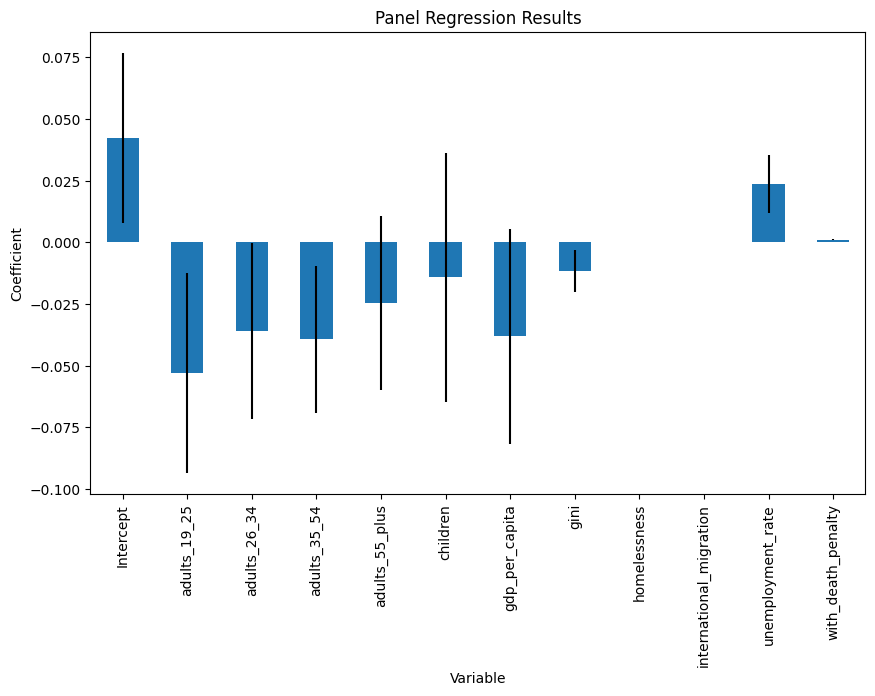

In [121]:
# Extract the relevant coefficients and standard errors
coefficients = results.params
se = results.std_errors

# Create a new DataFrame with the coefficients and standard errors
results_df = pd.concat([coefficients, se], axis=1)
results_df.columns = ['Coefficients', 'Standard Errors']

# Plot the results
results_df.plot(kind='bar', y='Coefficients', yerr='Standard Errors', figsize=(10, 6), legend=None)
plt.title('Panel Regression Results')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.show()


In [122]:
#save the result table to a graph
with open('regression_results.tex', 'w') as f:
    f.write(results.summary.as_latex())


### Discard outliers

In [123]:
df_abnormal.loc[:,['state','year','Violent_Crime_Rate']]

state  year  Violent_Crime_Rate
20       Alaska  2016            0.016091
21       Alaska  2017            0.016580
22       Alaska  2018            0.017833
23       Alaska  2019            0.017341
358  New Mexico  2018            0.016855
359  New Mexico  2019            0.016644

In [124]:
# discard rows in df_abnormal
df_no_outlier = df[~df.index.isin(df_abnormal.index)]

# set multi-index
df_no_outlier_panel = df_no_outlier.set_index(panel_vars)

# Run a fixed effects regression with time and entity fixed effects
model_no_outlier = PanelOLS.from_formula(f"{y_var} ~ 1 + {' + '.join(x_vars)} \
                                         + EntityEffects + TimeEffects", data=df_no_outlier_panel)
results_no_outlier = model_no_outlier.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(results_no_outlier.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Violent_Crime_Rate   R-squared:                        0.1721
Estimator:                   PanelOLS   R-squared (Between):              0.0542
No. Observations:                 570   R-squared (Within):              -0.0877
Date:                Tue, Apr 18 2023   R-squared (Overall):              0.0352
Time:                        21:48:26   Log-likelihood                    3390.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      9.4491
Entities:                          48   P-value                           0.0000
Avg Obs:                       11.875   Distribution:                  F(11,500)
Min Obs:                       8.0000                                           
Max Obs:                       12.000   F-statistic (robust):             14.988
                            

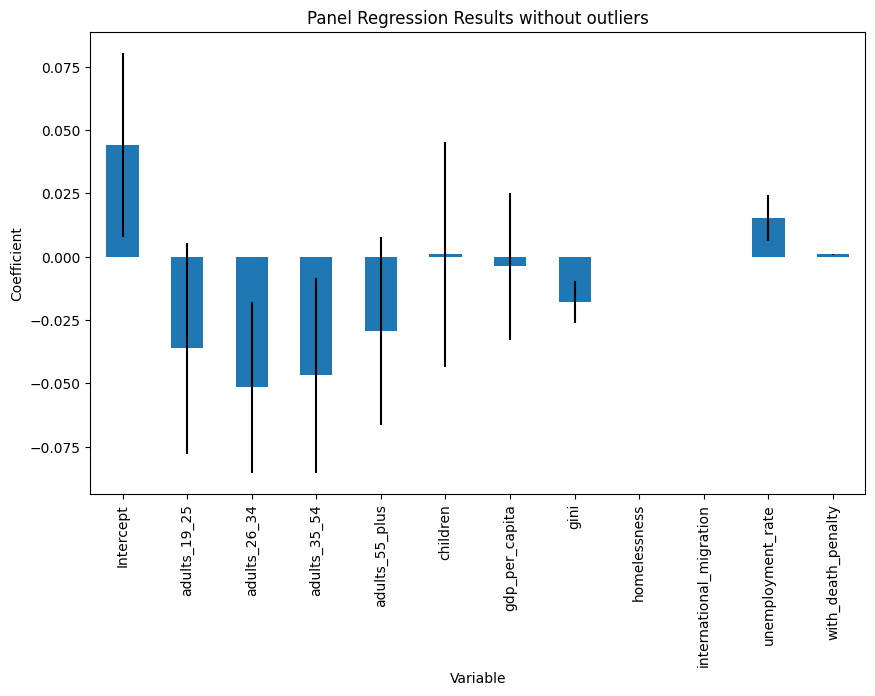

In [128]:
# Extract the relevant coefficients and standard errors
coefficients = results_no_outlier.params
se = results_no_outlier.std_errors

# Create a new DataFrame with the coefficients and standard errors
results_df = pd.concat([coefficients, se], axis=1)
results_df.columns = ['Coefficients', 'Standard Errors']

# Plot the results
results_df.plot(kind='bar', y='Coefficients', yerr='Standard Errors', figsize=(10, 6), legend=None)
plt.title('Panel Regression Results without outliers')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.show()


In [127]:
#save the result table to a graph
with open('regression_results_no_outliers_.tex', 'w') as f:
    f.write(results.summary.as_latex())


### only include states abolish death penalty

In [131]:
# select states in treatment_states
df_tr_states = df[df['state'].isin(treatment_states)]
assert df_tr_states.state.nunique() == 20, "There should be 20 states in the subset."

# set multi-index
df_tr_states_panel = df_tr_states.set_index(panel_vars)

# Run a fixed effects regression with time and entity fixed effects
model_tr_states = PanelOLS.from_formula(f"{y_var} ~ 1 + {' + '.join(x_vars)} + EntityEffects + TimeEffects",\
                               data=df_tr_states_panel)
results_tr_states = model_tr_states.fit(cov_type='clustered', cluster_entity=True, cluster_time=True)
print(results_tr_states.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:     Violent_Crime_Rate   R-squared:                        0.3582
Estimator:                   PanelOLS   R-squared (Between):             -0.0274
No. Observations:                 240   R-squared (Within):              -1.3347
Date:                Tue, Apr 18 2023   R-squared (Overall):             -0.1351
Time:                        21:54:00   Log-likelihood                    1403.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      10.045
Entities:                          20   P-value                           0.0000
Avg Obs:                       12.000   Distribution:                  F(11,198)
Min Obs:                       12.000                                           
Max Obs:                       12.000   F-statistic (robust):             3.6007
                            

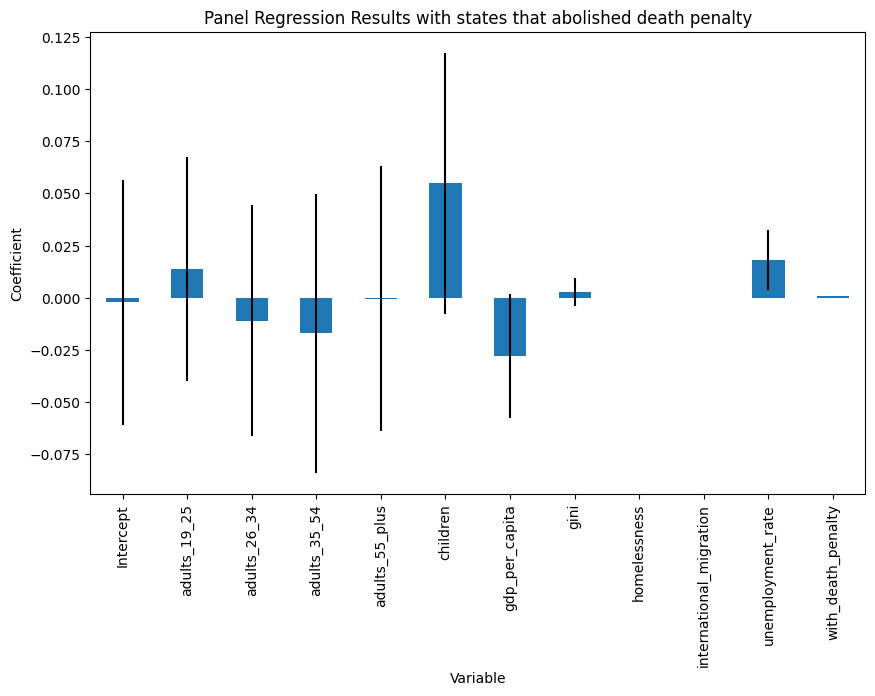

In [133]:
# Extract the relevant coefficients and standard errors
coefficients = results_tr_states.params
se = results_tr_states.std_errors

# Create a new DataFrame with the coefficients and standard errors
results_df = pd.concat([coefficients, se], axis=1)
results_df.columns = ['Coefficients', 'Standard Errors']

# Plot the results
results_df.plot(kind='bar', y='Coefficients', yerr='Standard Errors', figsize=(10, 6), legend=None)
plt.title('Panel Regression Results with states that abolished death penalty')
plt.ylabel('Coefficient')
plt.xlabel('Variable')
plt.show()


In [134]:
#save the result table to a graph
with open('regression_results_tr_states.tex', 'w') as f:
    f.write(results.summary.as_latex())


### Try Matching

In [57]:
df_copy = df.copy()

In [58]:
## Convert numeric variables into categorical
df_copy["State"] = pd.Categorical(df_copy.State).codes
df_copy["year"] = pd.Categorical(df_copy.year).codes

In [59]:
df_copy.columns

Index(['state', 'children', 'adults_19_25', 'adults_26_34', 'adults_35_54',
       'Adults 55-64', '65+', 'year', 'homelessness', 'gdp',
       'American Indian or Alaska Native', 'Asian or Pacific Islander',
       'Black or African American', 'White', 'gini', 'international_migration',
       'unemployment_rate', 'State', 'Population', 'Index', 'Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft', 'with_death_penalty',
       'Violent_Crimes', 'Violent_Crime_Rate', 'gdp_per_capita',
       'adults_55_plus', 'Cluster', 'penalty_category'],
      dtype='object')

In [60]:
df_copy.drop(
    axis=1,
    columns=[ 'year', 'State', 'Adults 55-64', '65+', 'American Indian or Alaska Native','Asian or Pacific Islander',
       'Black or African American', 'White', 'state', 'Violent',
       'Property', 'Murder', 'Rape', 'Robbery', 'Aggravated Assault',
       'Burglary', 'Larceny-Theft', 'Vehicle Theft'],
    inplace = True
)
df_copy.reset_index(inplace=True)


In [61]:
df_copy.drop(axis=1, labels=['index'],inplace=True)

In [62]:
df_copy

children  adults_19_25  adults_26_34  adults_35_54  homelessness   
0       0.258         0.095         0.113         0.282          5387  \
1       0.257         0.093         0.116         0.277          6080   
2       0.254         0.094         0.113         0.276          6046   
3       0.251         0.094         0.112         0.274          5558   
4       0.249         0.095         0.112         0.270          5209   
..        ...           ...           ...           ...           ...   
571     0.256         0.092         0.123         0.244           798   
572     0.255         0.089         0.121         0.245           857   
573     0.253         0.086         0.123         0.236           873   
574     0.243         0.083         0.121         0.244           639   
575     0.251         0.083         0.117         0.242           548   

          gdp    gini  international_migration  unemployment_rate  Population   
0    174526.3  0.4700                     5409              0.050     4677464  \
1    170930.9  0.4700                     5319              0.098     4708708   
2    177249.2  0.4700                     1053              0.093     4785401   
3    183916.6  0.4700                     5162              0.087     4803689   
4    189245.5  0.4700                     6282              0.073     4817528   
..        ...     ...                      ...                ...         ...   
571   38426.9  0.4374                      860              0.042      586555   
572   35879.0  0.4360                      530              0.053      585501   
573   36980.7  0.4326                      795              0.042      578934   
574   39171.7  0.4555                      708              0.041      577601   
575   39428.0  0.4345                      173              0.036      578759   

      Index  with_death_penalty  Violent_Crimes  Violent_Crime_Rate   
0    211401                   1           42218            0.009026  \
1    199201                   1           42388            0.009002   
2    187191                   1           36726            0.007675   
3    193358                   1           40332            0.008396   
4    190571                   1           43386            0.009006   
..      ...                 ...             ...                 ...   
571   12451                   1            2553            0.004353   
572   12890                   1            2805            0.004791   
573   11886                   1            2716            0.004691   
574   11543                   1            2470            0.004276   
575   10351                   1            2516            0.004347   

     gdp_per_capita  adults_55_plus  Cluster  penalty_category  
0          0.037312           0.253        3                 2  
1          0.036301           0.257        0                 2  
2          0.037040           0.264        0                 2  
3          0.038287           0.269        0                 2  
4          0.039283           0.274        0                 2  
..              ...             ...      ...               ...  
571        0.065513           0.284        4                 2  
572        0.061279           0.291        4                 2  
573        0.063877           0.302        4                 2  
574        0.067818           0.310        4                 2  
575        0.068125           0.307        4                 2  

[576 rows x 18 columns]

In [63]:
!pip install dame_flame
import dame_flame


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip


In [64]:
mat_model = dame_flame.matching.DAME(repeats=False,verbose=3, want_pe=True)
mat_model.fit(
    df_copy,
    treatment_column_name="with_death_penalty",
    outcome_column_name="Violent_Crime_Rate",
)

## Display results
result = mat_model.predict(df_copy)

Completed iteration 0 of matching
	Number of matched groups formed in total:  0
	Unmatched treated units:  373 out of a total of  373 treated units
	Unmatched control units:  203 out of a total of  203 control units
	Number of matches made this iteration:  0
	Number of matches made so far:  0
	Covariates dropped so far:  set()
	Predictive error of covariate set used to match:  7.624481282889369e-06
Completed iteration 1 of matching
	Number of matched groups formed in total:  0
	Unmatched treated units:  373 out of a total of  373 treated units
	Unmatched control units:  203 out of a total of  203 control units
	Number of matches made this iteration:  0
	Number of matches made so far:  0
	Covariates dropped so far:  frozenset({'gdp_per_capita'})
	Predictive error of covariate set used to match:  7.624481282889369e-06
Completed iteration 2 of matching
	Number of matched groups formed in total:  0
	Unmatched treated units:  373 out of a total of  373 treated units
	Unmatched control units

KeyboardInterrupt: 

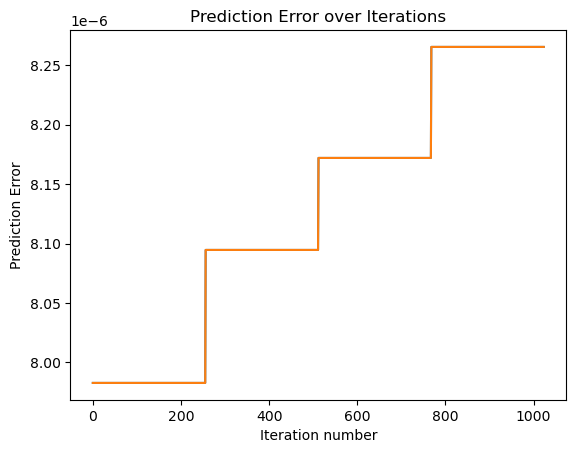

In [ ]:
plt.plot(mat_model.pe_each_iter)
plt.title("Prediction Error over Iterations")
plt.xlabel("Iteration number")
plt.ylabel("Prediction Error")
plt.show()